# Intercomparison Campaigns - Reconstruct Graphics of Beelitz' Intercomparison Campaign 1958

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [3]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time, sys

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [4]:
fs = open('path.txt', 'r')
path = fs.read()  
fs.close()
sys.path.append(path)

import cds_eua3 as eua
eua.logging_set_level(30)

In [5]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

In [46]:
# creating a list of files to open - selcting every aggregated file:
filestoopen = glob.glob('/raid60/scratch/leo/scratch/RI/Pangaea/nc/0-20100-0-004*.nc', recursive=True)
for i in range(len(filestoopen)):
    filestoopen[i] = filestoopen[i][42:-3]
print(filestoopen)

['0-20100-0-00401', '0-20100-0-00402', '0-20100-0-00403', '0-20100-0-00404', '0-20100-0-00405', '0-20100-0-00406', '0-20100-0-00407', '0-20100-0-00408', '0-20100-0-00409', '0-20100-0-00410', '0-20100-0-00411', '0-20100-0-00413', '0-20100-0-00412', '0-20100-0-00414']


In [396]:
# requesting and downloading the data:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'overwrite': True,
                   'statid': filestoopen[2:],
                   'optional': ['sonde_type'],
                   'format': 'csv'                   
               })

if True:
    # Start Download
    r.download(target='download.zip')
    # Check file size
    assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    # Unzip the Data Stream
    z = zipfile.ZipFile('download.zip')
    print("Unzipping retrieved files: to ./exampla_data/2")
    print(z.namelist())
    z.extractall(path='./example_data/2')
    z.close()
    os.remove('download.zip')
    print("Time elapsed: ", time.time()-t0, "s")

2020-09-30 15:24:49,703 INFO Welcome to the CDS
2020-09-30 15:24:49,704 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-30 15:24:49,748 INFO Request is queued
2020-09-30 15:24:50,782 INFO Request is running


KeyboardInterrupt: 

In [74]:
data = pandas.read_csv('example_data/2/temperature.csv', index_col=0)
data

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
obs_id,,,,,,,,,
0,46.812,6.942,1700.0,NaN,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
1,46.812,6.942,1700.0,229.05,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
2,46.812,6.942,1850.0,NaN,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
3,46.812,6.942,1850.0,227.75,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
4,46.812,6.942,1950.0,NaN,1956-05-27 09:49:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
...,...,...,...,...,...,...,...,...,...
31843,46.812,6.942,89600.0,NaN,1956-06-11 00:22:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13
31844,46.812,6.942,93600.0,277.35,1956-06-11 00:21:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13
31845,46.812,6.942,93600.0,NaN,1956-06-11 00:21:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13


In [77]:
x = data
x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
type(x.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
x

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
obs_id,,,,,,,,,
0,46.812,6.942,1700.0,NaN,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
1,46.812,6.942,1700.0,229.05,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
2,46.812,6.942,1850.0,NaN,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
3,46.812,6.942,1850.0,227.75,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
4,46.812,6.942,1950.0,NaN,1956-05-27 09:49:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
...,...,...,...,...,...,...,...,...,...
31843,46.812,6.942,89600.0,NaN,1956-06-11 00:22:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13
31844,46.812,6.942,93600.0,277.35,1956-06-11 00:21:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13
31845,46.812,6.942,93600.0,NaN,1956-06-11 00:21:00,BPL,0-20100-0-00414-063,0-20100-0-00414,13


---

In [81]:
# Aufteilen in Tag und Nacht
da = x
da_day = da.iloc[0:0]
da_night = da.iloc[0:0]
for j in range(len(da)):
    if(da.iloc[j].time.hour < 17. and da.iloc[j].time.hour > 6.):
        da_day = da_day.append(da.iloc[j], ignore_index = True)
    else:
        da_night = da_night.append(da.iloc[j], ignore_index = True)

In [84]:
da_day

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
0,46.812,6.942,1700.0,NaN,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
1,46.812,6.942,1700.0,229.05,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
2,46.812,6.942,1850.0,NaN,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
3,46.812,6.942,1850.0,227.75,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
4,46.812,6.942,1950.0,NaN,1956-05-27 09:49:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
...,...,...,...,...,...,...,...,...,...
15101,46.812,6.942,86500.0,NaN,1956-06-08 15:05:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15102,46.812,6.942,90900.0,281.65,1956-06-08 15:04:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15103,46.812,6.942,90900.0,NaN,1956-06-08 15:04:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15104,46.812,6.942,95800.0,285.25,1956-06-08 13:30:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13


In [296]:
da_day[0::2]

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
0,46.812,6.942,1700.0,NaN,1956-05-27 09:51:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
2,46.812,6.942,1850.0,NaN,1956-05-27 09:50:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
4,46.812,6.942,1950.0,NaN,1956-05-27 09:49:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
6,46.812,6.942,2100.0,NaN,1956-05-27 09:48:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
8,46.812,6.942,2250.0,NaN,1956-05-27 09:47:00,BBI,0-20100-0-00401-000,0-20100-0-00401,0
...,...,...,...,...,...,...,...,...,...
15096,46.812,6.942,78100.0,271.35,1956-06-08 15:07:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15098,46.812,6.942,82300.0,274.45,1956-06-08 15:06:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15100,46.812,6.942,86500.0,277.95,1956-06-08 15:05:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13
15102,46.812,6.942,90900.0,281.65,1956-06-08 15:04:00,BPL,0-20100-0-00414-061,0-20100-0-00414,13


---

In [324]:
x = da_day[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            try:
                f = interp1d(xxx.plev, xxx.ta)
                if(j == 'U4_,'):
                    ref = f(pressure_list)
                else:
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
            except:
                pass
    for k in temp:
        temp_all.append(k - ref) 
            

In [325]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

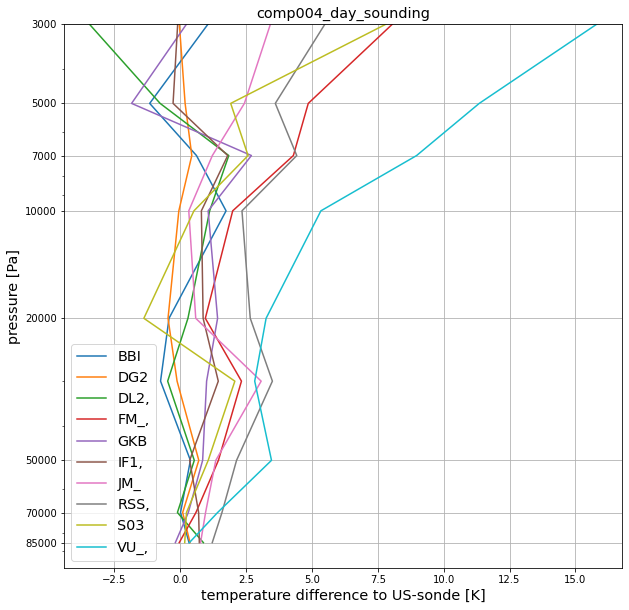

In [326]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(means)):
    try:
        ax1.semilogy(np.nanmean(means[i], axis = 0), pressure_list, label = st[i])
    except:
        pass
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format,yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [327]:
x = da_night[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            try:
                f = interp1d(xxx.plev, xxx.ta)
                if(j == 'U4_,'):
                    ref = f(pressure_list)
                else:
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
            except:
                pass
    for k in temp:
        temp_all.append(k - ref) 
            

In [328]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

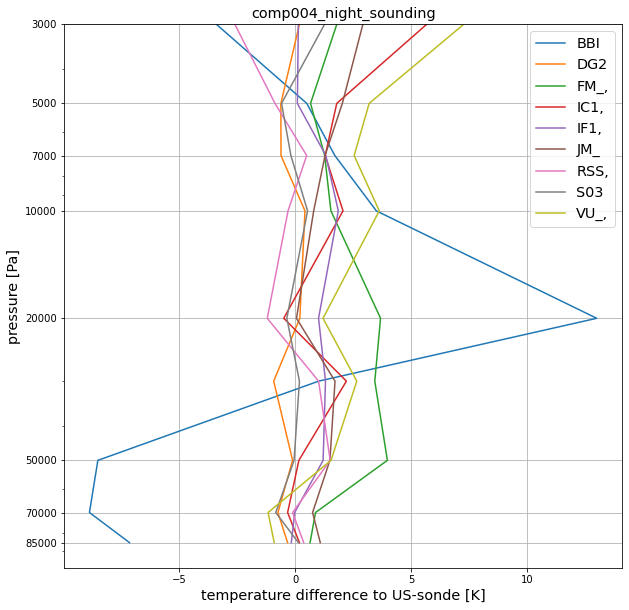

In [329]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(means)):
    try:
        ax1.semilogy(np.nanmean(means[i], axis = 0), pressure_list, label = st[i])
    except:
        pass
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

## "Es wurden jeweils die Differenzen zwischen den Daten der systematischen Differenzen nach Durchführung der Iteration und den Beträgen der amerikanischen (Radiosonden-Type Nr. 4) gebildet, also (RS_x - RS_4) und dann erst wieder analog der Tabellen 3, 6 und 8 die gewogenen Mittel gebildet." 

In [397]:
x = da_day[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            try:
                f = interp1d(xxx.plev, xxx.ta)
                temp.append(f(pressure_list))
                sond_all.append(xxx.iloc[0].sonde_type)
            except:
                pass
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [398]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [399]:
for i in range(len(means)):
    print(st[i])
    print(len(means[i]))

BBI
7
DG2
42
DL2,
14
FM_,
21
GKB
5
IF1,
5
JM_
24
RSS,
26
S03
39
U4_,
50
VU_,
7


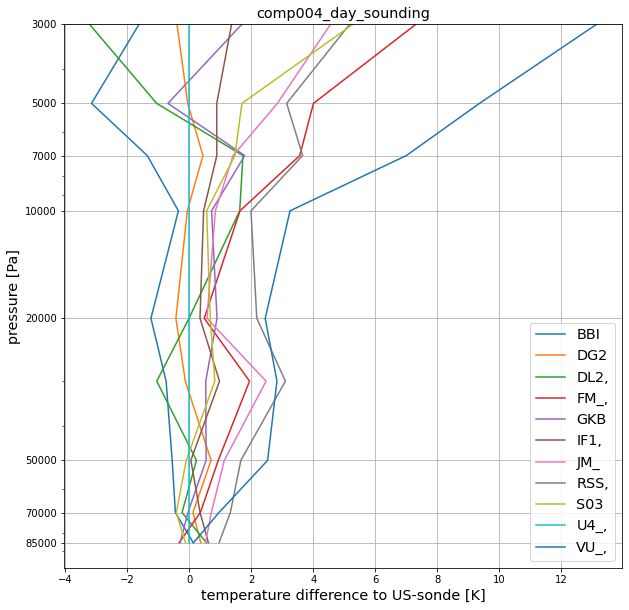

In [400]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(means)):
    try:
        # difference of sondtype mean and us sond mean
        ax1.semilogy((np.nanmean(means[i], axis = 0)) - (np.nanmean(means[-2], axis = 0)), pressure_list, label = st[i])
    except:
        pass
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [401]:
x = da_night[0::2]
# x = x[~np.isnan(x.ta)]
sond_all = []
temp_all = []
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            try:
                f = interp1d(xxx.plev, xxx.ta)
                temp.append(f(pressure_list))
                sond_all.append(xxx.iloc[0].sonde_type)
            except:
                pass
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [402]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

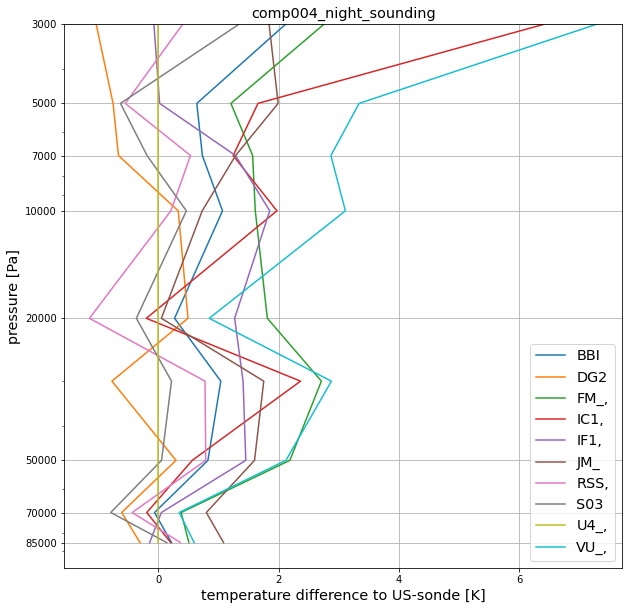

In [403]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
#     -
for i in range(len(means)):
    try:
        # difference of sondtype mean and us sond mean
        ax1.semilogy((np.nanmean(means[i], axis = 0)) - (np.nanmean(means[-2], axis = 0)), pressure_list, label = st[i])
    except:
        pass
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()